### 1. 一共有多少不同的用户

In [1]:
import pandas as pd
ratings = pd.read_csv("C:/Users/10920/Desktop/ml-25m/ratings.csv", header=0)
num = ratings["userId"].nunique()
print("一共有 %d 位不同的用户" % num)

一共有 162541 位不同的用户


### 2. 一共有多少不同的电影

In [2]:
import pandas as pd
movies = pd.read_csv("C:/Users/10920/Desktop/ml-25m/movies.csv", header=0)
num = movies["movieId"].nunique()
print("一共有 %d 个不同的电影" % num)

一共有 62423 个不同的电影


### 3. 一共有多少不同的电影种类

In [5]:
import csv 
csv_movies = csv.reader(open('C:/Users/10920/Desktop/ml-25m/movies.csv','r', encoding='UTF-8'))    #  movieId  title  genres

genres = []
for i, line in enumerate(csv_movies):
    if i > 0:                           # 去除表头
        if line[2] != '(no genres listed)':
            genres.extend(line[2].split("|"))

print("一共有 %d 个不同的电影种类" % len(set(genres)))

一共有 19 个不同的电影种类


### 4. 一共有多少电影没有外部链接

In [3]:
import pandas as pd
movies = pd.read_csv("C:/Users/10920/Desktop/ml-25m/movies.csv", header=0)
links = pd.read_csv("C:/Users/10920/Desktop/ml-25m/links.csv", header=0)
join = movies.join(links, how='left', lsuffix='_l', rsuffix='_r')
num = join['imdbId'].isnull().sum(axis=0)
print("一共有 %d 电影没有外部链接" % num)

一共有 0 电影没有外部链接


### 5. 2018年一共有多少人进行过电影评分

In [4]:
import pandas as pd
import time
ratings = pd.read_csv("C:/Users/10920/Desktop/ml-25m/ratings.csv", header=0)
def timestamp_tran_year(timestamp):
    return time.gmtime(timestamp).tm_year
ratings['year'] = ratings['timestamp'].apply(timestamp_tran_year)
num = ratings[(ratings['year'] == 2018)]['userId'].nunique()
print("2018年一共有 %d 人进行过电影评分" % num)

2018年一共有 12001 人进行过电影评分


### 6. 2018年评分5分以上的电影及其对应的标签

In [7]:
import pandas as pd
import time
ratings = pd.read_csv("C:/Users/10920/Desktop/ml-25m/ratings.csv", header=0)
def timestamp_tran_year(timestamp):
    return time.gmtime(timestamp).tm_year
ratings['year'] = ratings['timestamp'].apply(timestamp_tran_year)

# 先求出2018年评分5分以上的电影id
ratings_2018 = ratings[(ratings['year'] == 2018)]
ratings_2018_mean = ratings_2018.groupby('movieId').agg({'rating': 'mean'})
ratings_2018_mean_dayu5 = ratings_2018_mean[(ratings_2018_mean['rating'] >= 5)]
ratings_2018_mean_dayu5['movieId'] = ratings_2018_mean_dayu5.index
# 再求出电影id对应的标签
import pandas as pd
tags = pd.read_csv("C:/Users/10920/Desktop/ml-25m/tags.csv", header=0)
def agg_tag(x):
    tag_list = []
    for i in x:
        if str(i) not in tag_list:
            tag_list.append(str(i))
        else:
            continue
    return '|'.join(tag_list)

tags1 = tags.groupby('movieId').agg({'tag': agg_tag})
tags1['movieId'] = tags1.index
# join操作
join1 = ratings_2018_mean_dayu5.join(tags1, how='left', rsuffix='_r')
result = join1[['movieId', 'rating', 'tag']]
print(result)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


         movieId  rating                                                tag
movieId                                                                    
244          244     5.0                                                VHS
389          389     5.0  Gérard Depardieu|Yves Angelo|Gerard Depardieu|...
476          476     5.0                                                NaN
650          650     5.0  death of husband|evil priest|mother daughter r...
834          834     5.0  african american|beach|mercedes|obesity|summer...
1168        1168     5.0  animal horror|dog|lycanthrope|norse mythology|...
1360        1360     5.0  Criterion|nudity (full frontal)|Michelangelo A...
1525        1525     5.0  american football|chinese food|kangaroo|mythol...
1890        1890     5.0                                               BD-R
2049        2049     5.0                                             Disney
2623        2623     5.0                                   high school|prom
2778        

### 7. 绘制电影复仇者联盟（The Avengers）每个月评分的平均值变化曲线图

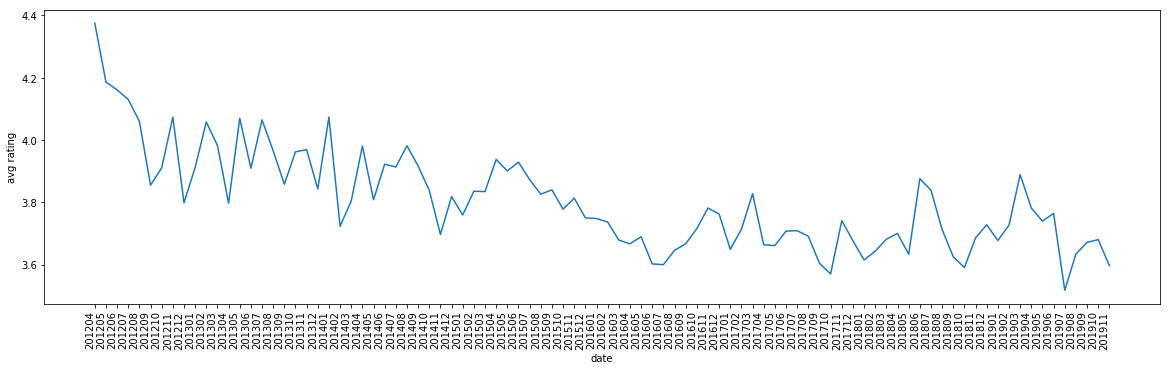

In [11]:
# 复仇者联盟（The Avengers）的movieId为 89745
import pandas as pd
import time
ratings = pd.read_csv("C:/Users/10920/Desktop/ml-25m/ratings.csv", header=0)
ratings = ratings[(ratings['movieId'] == 89745) & (ratings['timestamp'] >= 1335517219)]
def timestamp_tran_yearmon(timestamp):
    return time.strftime('%Y%m', time.localtime(int(timestamp)))
ratings['year_mon'] = ratings['timestamp'].apply(timestamp_tran_yearmon)
ratings_yearmon_mean = ratings.groupby('year_mon').agg({'rating': ('mean',)})
ratings_yearmon_mean['year_mon'] = ratings_yearmon_mean.index

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,6))
plt.plot(ratings_yearmon_mean.year_mon, # x轴数据
         ratings_yearmon_mean.rating, # y轴数据
         linestyle='-'  # 折线类型
         )
plt.xlabel('date')
plt.ylabel('avg rating')
fig.autofmt_xdate(rotation = 90)
plt.show()